In [122]:
import os

path = '../data/OX_dataset/'
os.listdir(path)

['o.86.png',
 'x.115.jpg',
 'x.129.jpg',
 'x.76.png',
 'x.71.png',
 'o.18.png',
 'o.193.jpg',
 'x.58.png',
 'o.48.png',
 'x.24.png',
 'o.74.png',
 'o.124.jpg',
 'x.167.jpg',
 'o.22.png',
 'x.135.jpg',
 'o.160.jpg',
 'o.71.png',
 'o.136.jpg',
 'x.32.png',
 'o.39.png',
 'x.56.png',
 'x.12.png',
 'x.128.jpg',
 'o.38.png',
 'o.188.jpg',
 'o.109.jpg',
 'x.147.jpg',
 'x.80.png',
 'x.119.jpg',
 'o.63.png',
 'x.4.png',
 'x.154.jpg',
 'o.190.jpg',
 'o.184.jpg',
 'x.59.png',
 'x.126.jpg',
 'x.39.png',
 'x.205.jpg',
 'o.16.png',
 'o.89.png',
 'o.179.jpg',
 'x.150.jpg',
 'o.163.jpg',
 'x.160.jpg',
 'x.172.jpg',
 'x.40.png',
 'x.141.jpg',
 'x.74.png',
 'o.144.jpg',
 'o.103.png',
 'x.158.jpg',
 'o.177.jpg',
 'x.87.png',
 'o.25.png',
 'o.17.png',
 'x.50.png',
 'o.28.png',
 'x.45.png',
 'o.199.jpg',
 'x.21.png',
 'x.116.jpg',
 'o.173.jpg',
 'x.195.jpg',
 'x.179.jpg',
 'x.84.png',
 'x.91.png',
 'o.45.png',
 'o.141.jpg',
 'o.67.png',
 'o.80.png',
 'o.196.jpg',
 'x.170.jpg',
 'x.34.png',
 'x.145.jpg',
 '

In [123]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]
print(labels[:10])
print(file_id[:10])

['o', 'x', 'x', 'x', 'x', 'o', 'o', 'x', 'o', 'x']
['86', '115', '129', '76', '71', '18', '193', '58', '48', '24']


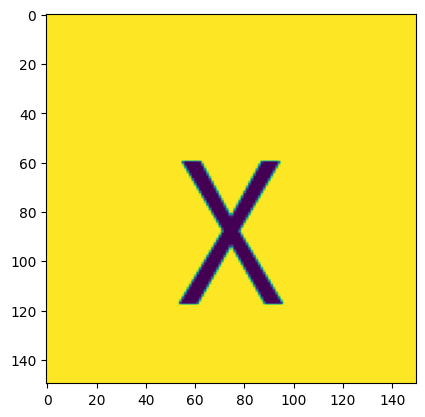

In [124]:
import random 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()


In [125]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(224, 224, 3)

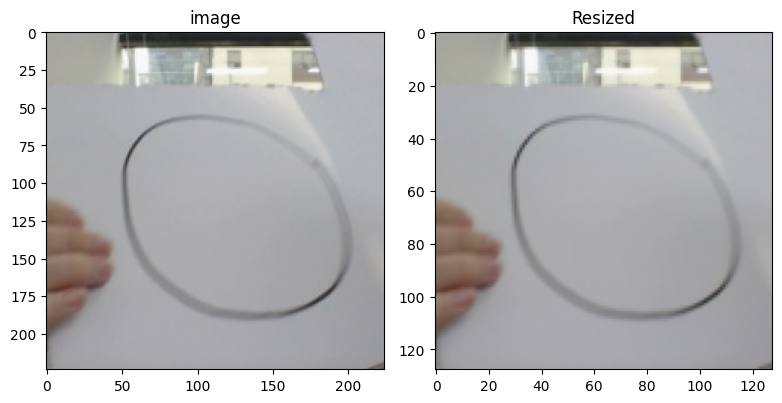

In [126]:
from skimage.transform import resize
resized = resize(image, (128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize = (8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap = plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()


In [127]:
full_names

['o.86.png',
 'x.115.jpg',
 'x.129.jpg',
 'x.76.png',
 'x.71.png',
 'o.18.png',
 'o.193.jpg',
 'x.58.png',
 'o.48.png',
 'x.24.png',
 'o.74.png',
 'o.124.jpg',
 'x.167.jpg',
 'o.22.png',
 'x.135.jpg',
 'o.160.jpg',
 'o.71.png',
 'o.136.jpg',
 'x.32.png',
 'o.39.png',
 'x.56.png',
 'x.12.png',
 'x.128.jpg',
 'o.38.png',
 'o.188.jpg',
 'o.109.jpg',
 'x.147.jpg',
 'x.80.png',
 'x.119.jpg',
 'o.63.png',
 'x.4.png',
 'x.154.jpg',
 'o.190.jpg',
 'o.184.jpg',
 'x.59.png',
 'x.126.jpg',
 'x.39.png',
 'x.205.jpg',
 'o.16.png',
 'o.89.png',
 'o.179.jpg',
 'x.150.jpg',
 'o.163.jpg',
 'x.160.jpg',
 'x.172.jpg',
 'x.40.png',
 'x.141.jpg',
 'x.74.png',
 'o.144.jpg',
 'o.103.png',
 'x.158.jpg',
 'o.177.jpg',
 'x.87.png',
 'o.25.png',
 'o.17.png',
 'x.50.png',
 'o.28.png',
 'x.45.png',
 'o.199.jpg',
 'x.21.png',
 'x.116.jpg',
 'o.173.jpg',
 'x.195.jpg',
 'x.179.jpg',
 'x.84.png',
 'x.91.png',
 'o.45.png',
 'o.141.jpg',
 'o.67.png',
 'o.80.png',
 'o.196.jpg',
 'x.170.jpg',
 'x.34.png',
 'x.145.jpg',
 '

In [128]:
from tqdm import tqdm
from tqdm.notebook import tqdm
# from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (150, 150, 1)))
images = np.array(images)

  0%|          | 0/411 [00:00<?, ?it/s]

In [129]:
images.shape, labels[:3]

((411, 150, 150, 1), ['o', 'x', 'x'])

In [130]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 1, 1]), array(['o', 'x'], dtype='<U1'))

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(images, labels_encoded, test_size = 0.2,
                     random_state = 13, stratify = labels_encoded)
X_train.shape, X_test.shape

((328, 150, 150, 1), (83, 150, 150, 1))

In [132]:
# 강의자료 6번
# from tensorflow.keras import layers, models 
# model = models.Sequential([
#     layers.Conv2D(32, kernel_size = (5, 5), strides = (1, 1),
#                   padding = 'same', activation = 'relu', input_shape = (150, 150, 1)),
#     layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
#     layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu', padding = 'same'),
#     layers.MaxPooling2D(pool_size = (2,2)),
#     layers.Dropout(0.25),
#     layers.Flatten(),
#     layers.Dense(1000, activation = 'relu'),
#     layers.Dense(10, activation = 'softmax')                      
# ])

# model.summary()

# 강의자료 4벉
from tensorflow.keras import layers, models  

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 1)),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation = 'softmax')
])

# model = models.Sequential([
#         layers.Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh', input_shape=(150, 150, 1)),
#         layers.AvgPool2D(pool_size=(2, 2), strides=2),
#         layers.Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh'),
#         layers.AvgPool2D(pool_size=(2, 2), strides=2),
#         layers.Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh'),
#         layers.Flatten(),
#         layers.Dense(84, activation='tanh'),
#         layers.Dense(10, activation='softmax')
#     ])
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 37, 37, 64)       

In [133]:
import time  
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
start_time = time.time()
hist = model.fit(X_train, y_train, epochs = 10, verbose = 1,
                 validation_data = (X_test, y_test))
print("fit time : ", time.time() - start_time)

Epoch 1/10
11/11 [==============================] - 1s 43ms/step - loss: 2.7317 - accuracy: 0.4909 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 2/10
11/11 [==============================] - 0s 28ms/step - loss: 0.6943 - accuracy: 0.5061 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 3/10
11/11 [==============================] - 0s 28ms/step - loss: 0.6932 - accuracy: 0.5061 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 4/10
11/11 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5061 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 5/10
11/11 [==============================] - 0s 28ms/step - loss: 0.6932 - accuracy: 0.5244 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 6/10
11/11 [==============================] - 0s 28ms/step - loss: 0.6929 - accuracy: 0.4909 - val_loss: 0.6929 - val_accuracy: 0.5060
Epoch 7/10
11/11 [==============================] - 0s 28ms/step - loss: 0.6813 - accuracy: 0.6098 - val_loss: 0.6560 - val_accuracy: 0.7349
Epoch 8/10
11

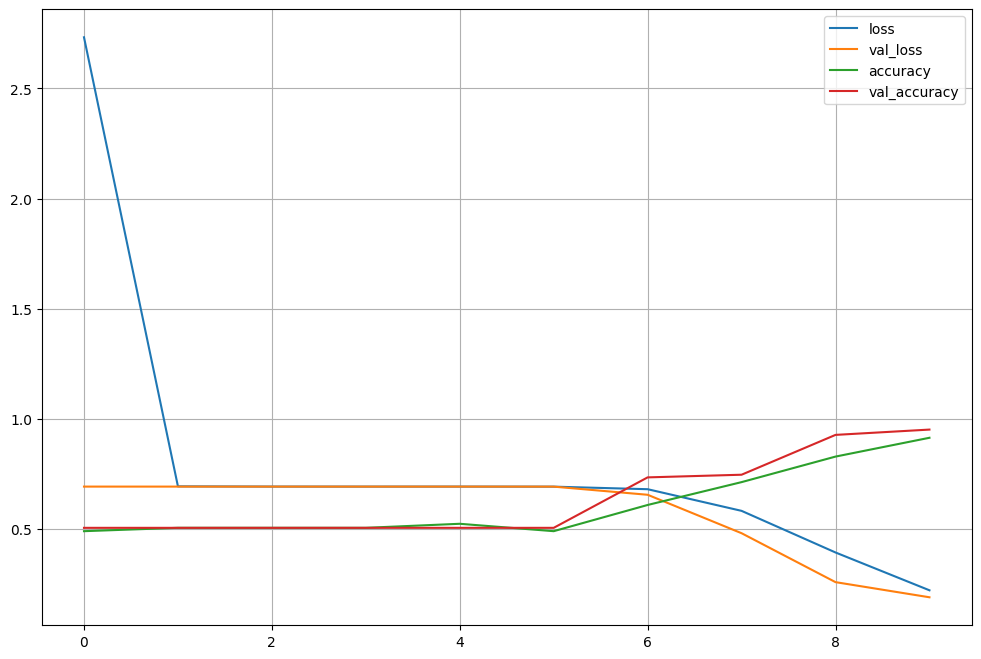

In [134]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()


In [135]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

3/3 [==============================] - 0s 9ms/step - loss: 0.1910 - accuracy: 0.9518
Test loss : 0.1909583956003189
Test accuracy : 0.9518072009086609


In [136]:
import numpy as np  

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [137]:
correct_result = []
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] == y_test[n]:
        correct_result.append(n)
    elif predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
print(len(wrong_result))
print(len(correct_result))

4
79


In [140]:
import random  
samples = random.choices(population = correct_result, k = 16)
samples  

[77, 34, 63, 60, 55, 46, 78, 21, 31, 30, 25, 19, 15, 17, 15, 12]

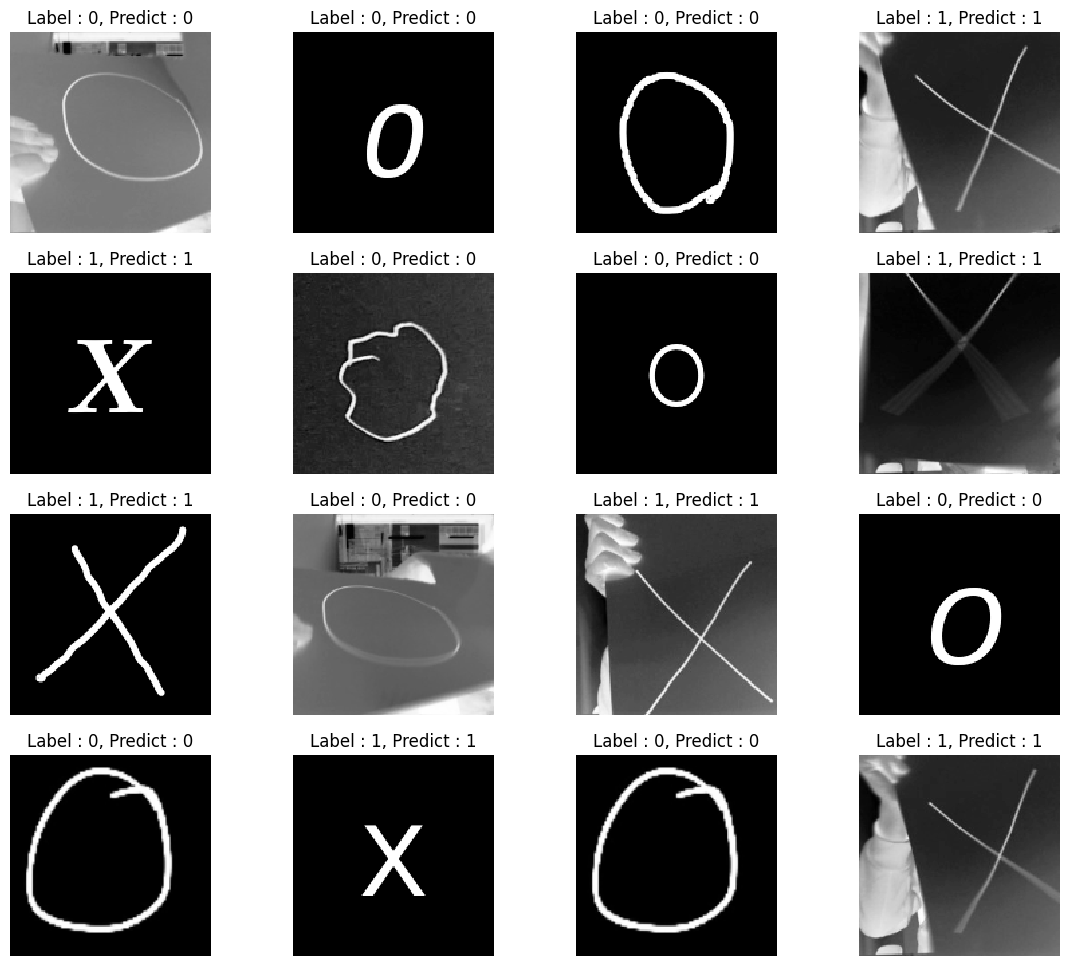

In [141]:
plt.figure(figsize = (14, 12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_test[n].reshape(150, 150, 1), cmap = 'Greys', interpolation = 'nearest')
    plt.title('Label : ' + str(y_test[n]) + ', Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
plt.show()

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predicted_labels))
print(confusion_matrix(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.95      0.95      0.95        42

    accuracy                           0.95        83
   macro avg       0.95      0.95      0.95        83
weighted avg       0.95      0.95      0.95        83

[[39  2]
 [ 2 40]]
